# 28 · Flujo óptico: definición y ecuaciones básicas

## Definición de flujo óptico

El flujo óptico es el campo de vectores de movimiento aparente de la intensidad de imagen entre dos instantes de tiempo consecutivos. Sea $I(x,y,t)$ la intensidad de la imagen en la posición $(x,y)$ y tiempo $t$. Se define el vector de flujo óptico $\mathbf{w}(x,y) = (u(x,y), v(x,y))^\top$, donde $u$ y $v$ representan el desplazamiento en píxeles en las direcciones $x$ e $y$ entre dos imágenes consecutivas.

## Supuesto de brillo constante y ecuación de flujo óptico

Supuesto de brillo constante:

$I(x,y,t) = I(x + u, y + v, t + \Delta t)$

Aplicando una expansión de Taylor de primer orden y despreciando términos de orden superior:

$I(x + u, y + v, t + \Delta t) \approx I(x,y,t) + I_x u + I_y v + I_t \Delta t$

Imponiendo $I(x,y,t) = I(x + u, y + v, t + \Delta t)$, se obtiene la ecuación de flujo óptico:

$I_x u + I_y v + I_t = 0$

donde $I_x$, $I_y$ e $I_t$ son las derivadas parciales de la intensidad con respecto a $x$, $y$ y $t$.

## Flujo óptico denso y disperso

- **Flujo óptico denso:** estima $(u,v)$ para cada píxel de la imagen. Se obtiene un campo de vectores definido en toda la cuadrícula de la imagen.
- **Flujo óptico disperso:** estima $(u,v)$ solamente en un conjunto de puntos de interés. Los puntos se seleccionan según un criterio, por ejemplo esquinas o características robustas.

## Formulación local de Lucas–Kanade

En el método de Lucas–Kanade se asume que el vector de flujo $(u,v)$ es aproximadamente constante dentro de una vecindad $\Omega$ alrededor de $(x,y)$. Para todos los píxeles $(x_i,y_i) \in \Omega$ se escribe la ecuación de flujo óptico:

$I_x(x_i,y_i) u + I_y(x_i,y_i) v + I_t(x_i,y_i) = 0$

En forma matricial:

$A \mathbf{w} = \mathbf{b}$

con

$A = \begin{bmatrix} I_x(x_1,y_1) & I_y(x_1,y_1) \\ \vdots & \vdots \\ I_x(x_n,y_n) & I_y(x_n,y_n) \end{bmatrix}, \quad \mathbf{w} = \begin{bmatrix} u \\ v \end{bmatrix}, \quad \mathbf{b} = -\begin{bmatrix} I_t(x_1,y_1) \\ \vdots \\ I_t(x_n,y_n) \end{bmatrix}$

La solución en mínimos cuadrados viene dada por:

$\mathbf{w} = (A^\top A)^{-1} A^\top \mathbf{b}$

## Visualización de flujo óptico denso con Farnebäck

Sea $I_t$ e $I_{t+1}$ una pareja de imágenes consecutivas extraídas de un video. El campo de flujo óptico denso $(u(x,y), v(x,y))$ se puede estimar mediante el algoritmo de Farnebäck y visualizar mediante una codificación en espacio HSV, donde el tono representa la dirección del movimiento y el valor la magnitud.

Imports y ruta del video.

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

VIDEO_PATH = r"C:\\Users\\20808\\Documents\\Repositorios\\Vision_en_Robotica\\imagenes\\coches.mp4"

Cálculo y visualización de flujo óptico denso con Farnebäck en dos frames consecutivos.

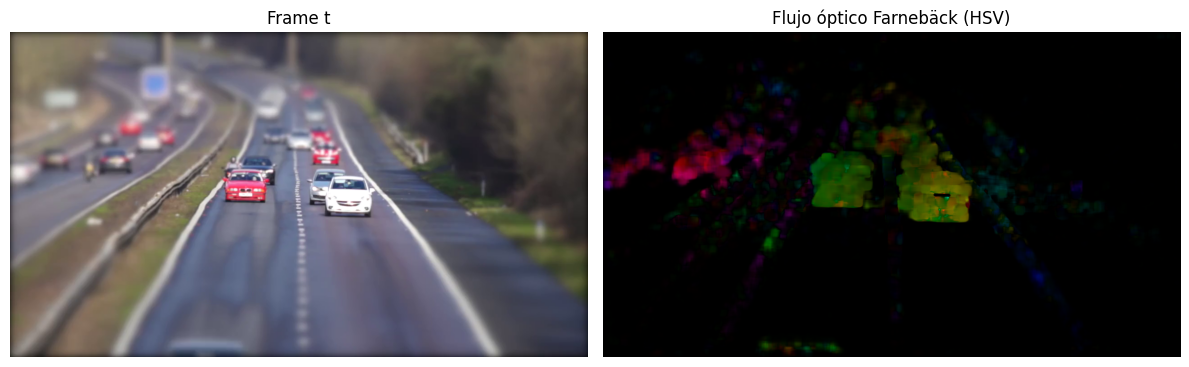

In [12]:
cap = cv2.VideoCapture(VIDEO_PATH)
ret1, frame1 = cap.read()
ret2, frame2 = cap.read()
if not ret1 or not ret2:
    cap.release()
    raise RuntimeError("No se pudieron leer dos frames consecutivos del video.")
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
hsv[...,0] = ang * 180 / np.pi / 2.0
mag_norm = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
hsv[...,2] = mag_norm.astype(np.uint8)
bgr_flow = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
rgb_frame = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
rgb_flow = cv2.cvtColor(bgr_flow, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(rgb_frame); plt.title("Frame t"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(rgb_flow); plt.title("Flujo óptico Farnebäck (HSV)"); plt.axis("off")
plt.tight_layout(); plt.show()
cap.release()